### Importing Libraries

In [164]:
# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Manipulation
import numpy as np 
import pandas as pd
import sklearn
from itertools import cycle


# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Importing Models
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier as KNN #K-Nearest Neighbors
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.multiclass import OneVsRestClassifier

### Reading Dataset

In [107]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Checking for Dataset skewness

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64


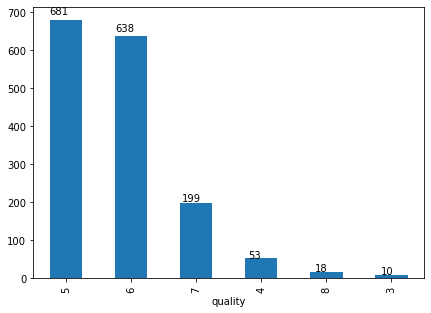

In [108]:
ax = df.value_counts("quality").plot.bar(figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
print(df["quality"].value_counts(normalize=True)*100)

We can see the dataset is skewed (unbalanced). <br>
Of whole dataset **~5% belong to class 4, 8 and 3 combined**

In [109]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Checking missing values

In [110]:
df.isnull().sum() #No missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values. Pretty clean dataset!

### Exploring Features 

In [111]:
features = df.columns[:-1]
output = df.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
quality


#### Analysing Feature Distribution

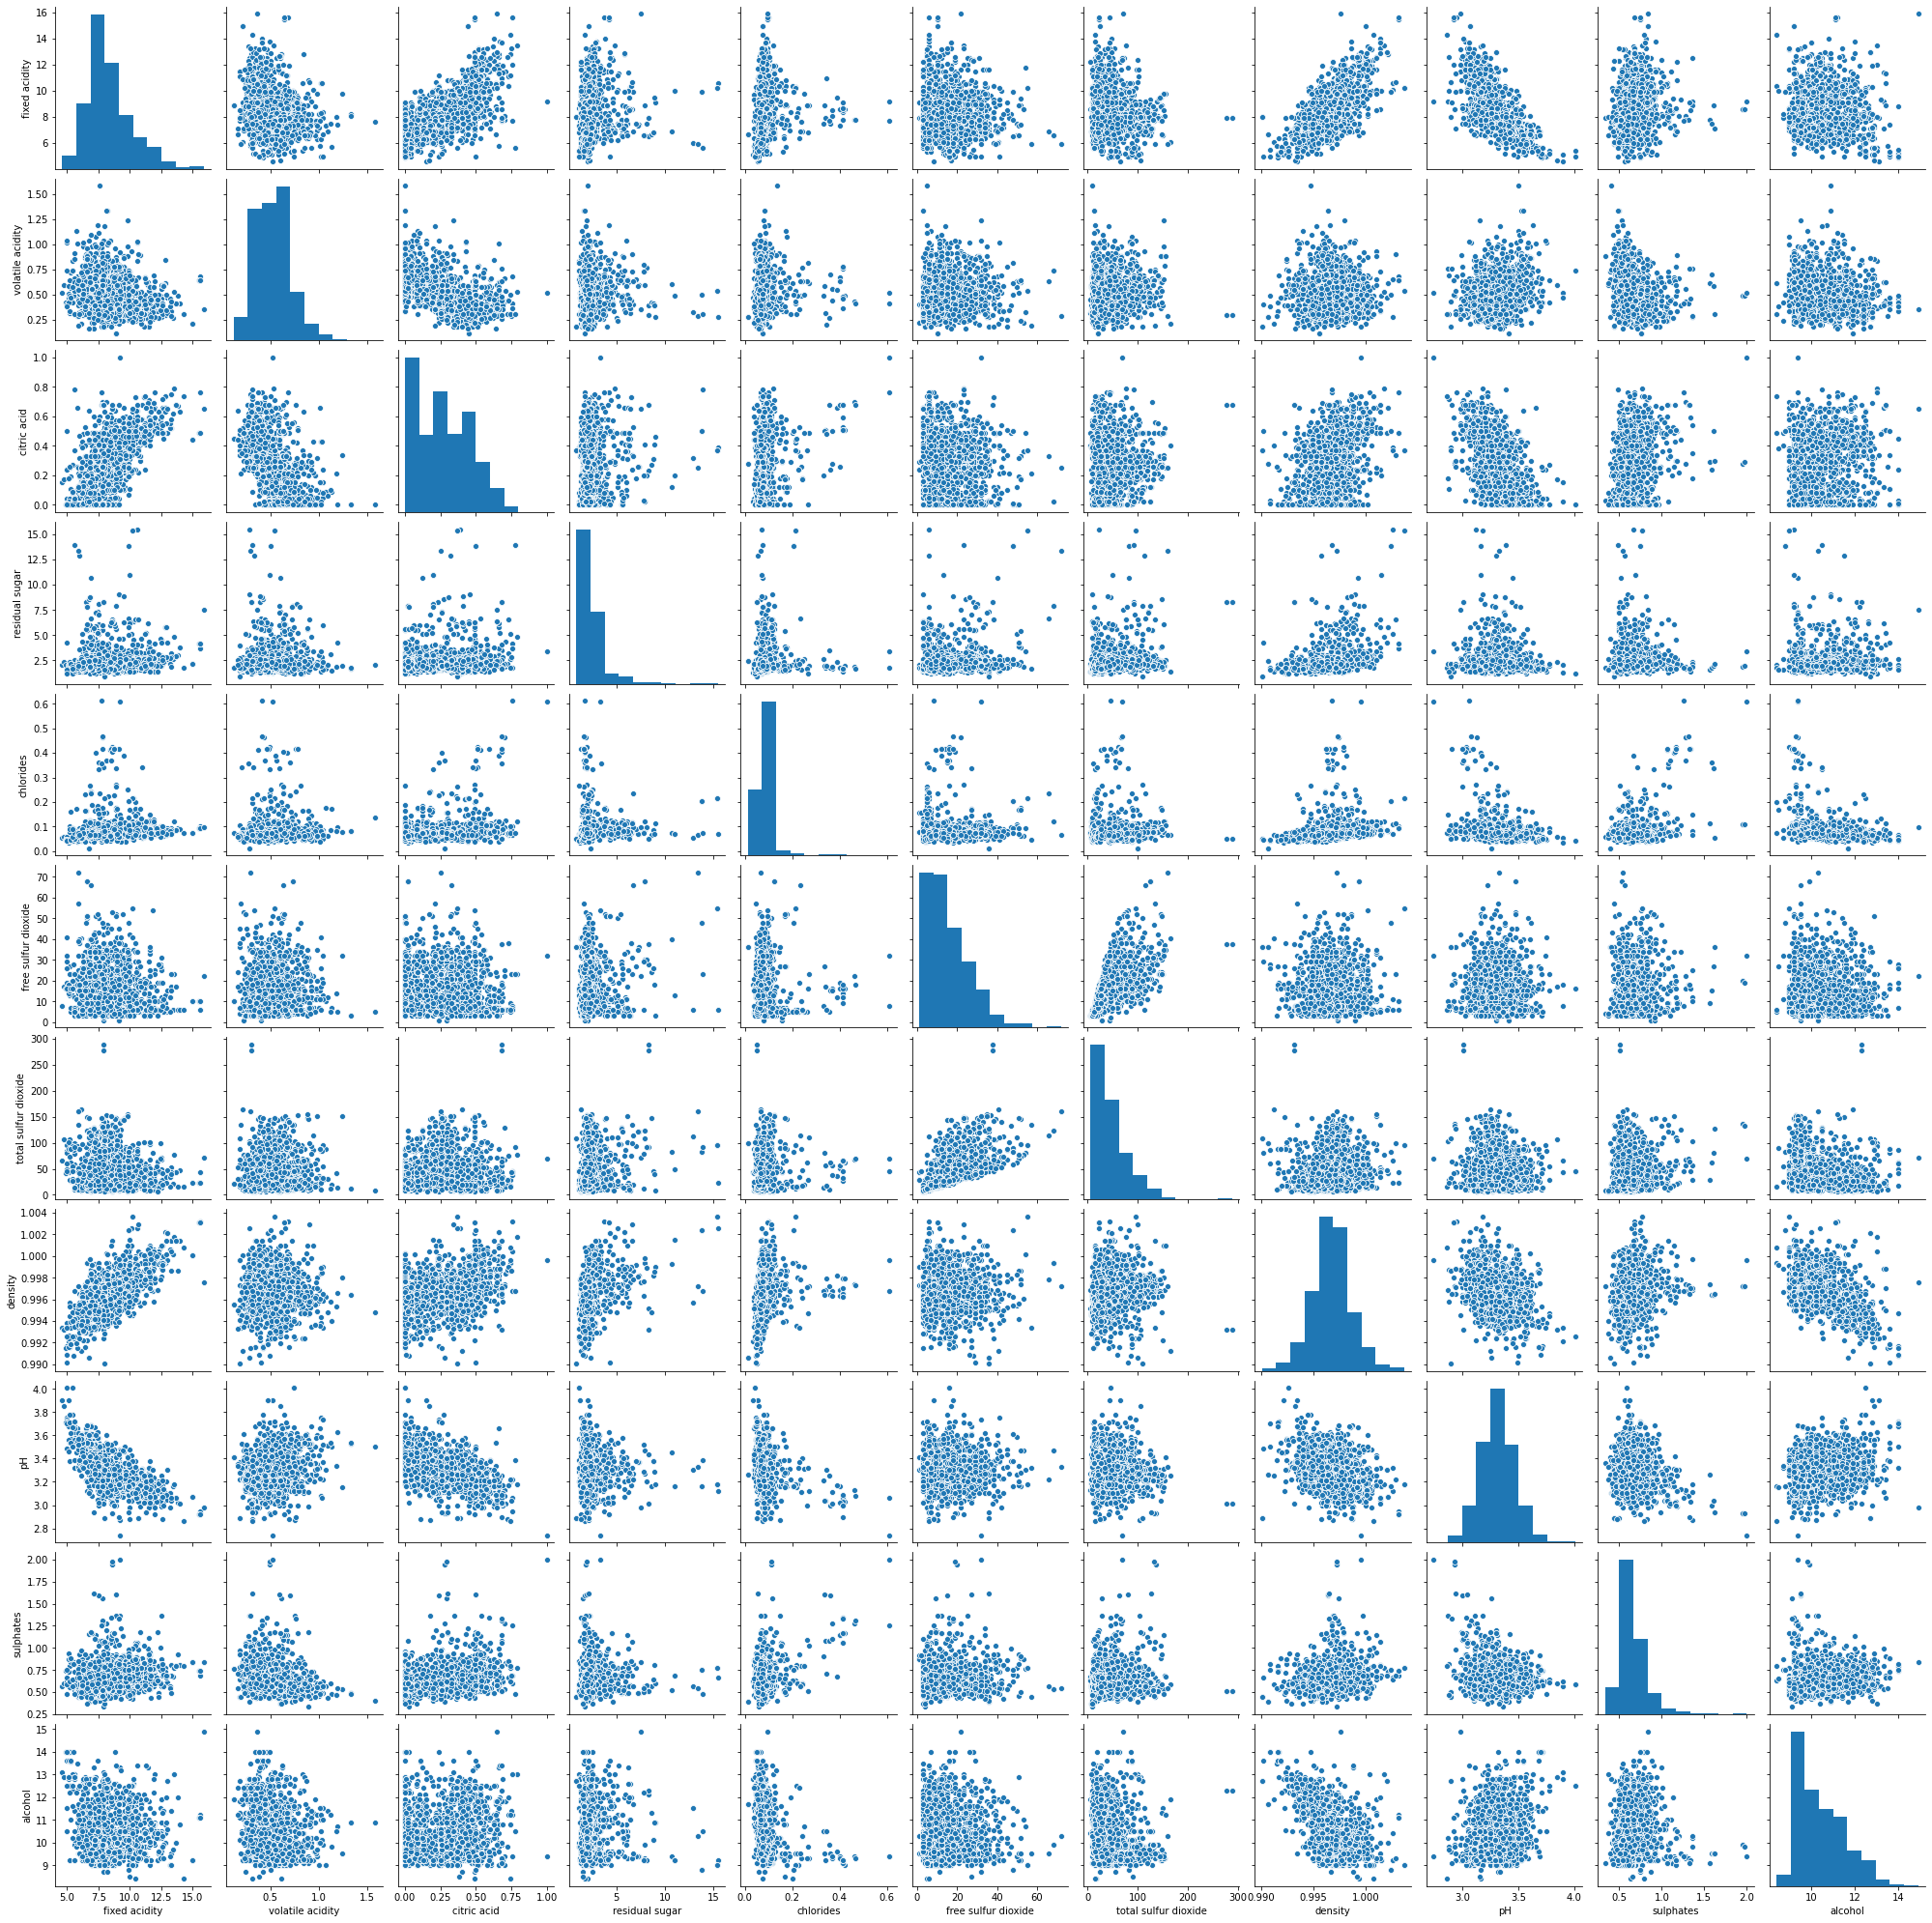

In [112]:
sns.pairplot(df[features],palette='coolwarm')
plt.show()

We can see there are many 

In [113]:
for f in features:
    print('Feature:{}\n Skew = {} \n\n'.format(f,df[f].skew()))

Feature:fixed acidity
 Skew = 0.9827514413284587 


Feature:volatile acidity
 Skew = 0.6715925723840199 


Feature:citric acid
 Skew = 0.3183372952546368 


Feature:residual sugar
 Skew = 4.54065542590319 


Feature:chlorides
 Skew = 5.680346571971724 


Feature:free sulfur dioxide
 Skew = 1.250567293314441 


Feature:total sulfur dioxide
 Skew = 1.515531257594554 


Feature:density
 Skew = 0.07128766294927483 


Feature:pH
 Skew = 0.19368349811284427 


Feature:sulphates
 Skew = 2.4286723536602945 


Feature:alcohol
 Skew = 0.8608288068888538 




#### Analysing Feature Correlation

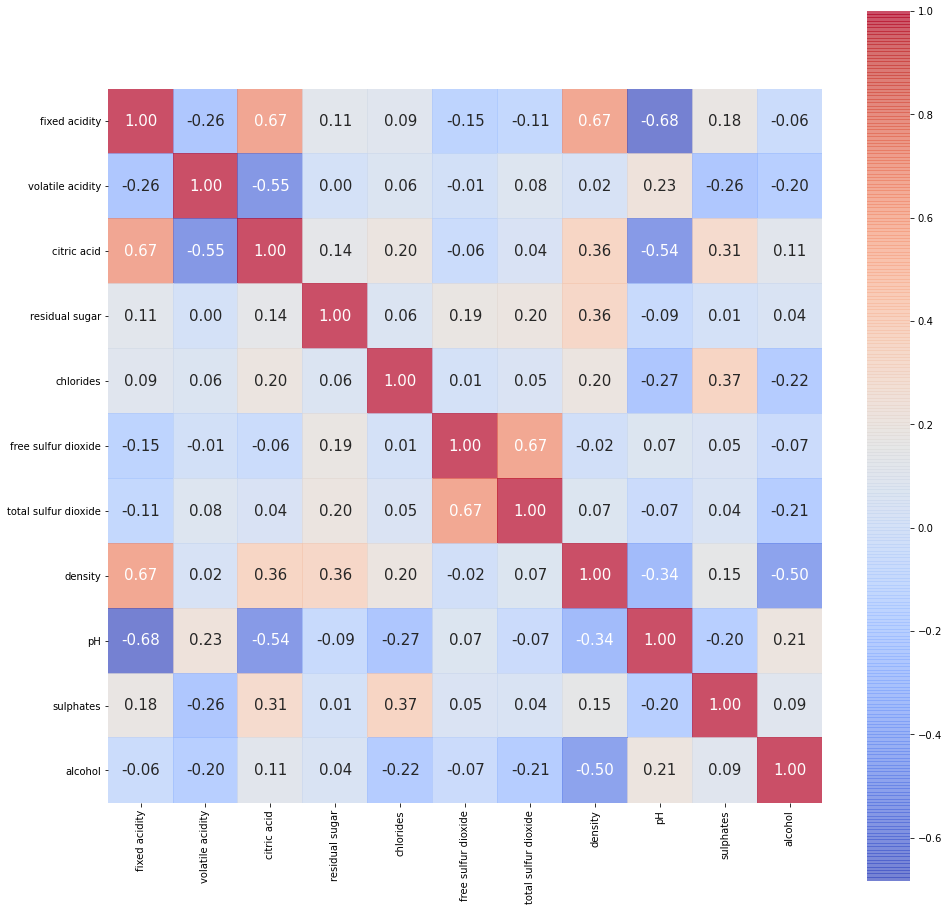

In [114]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

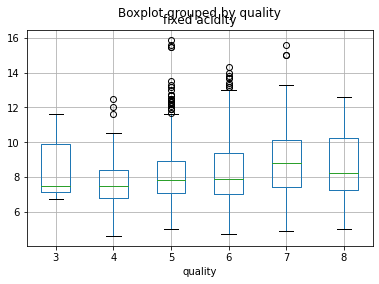

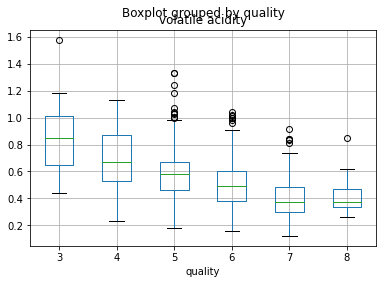

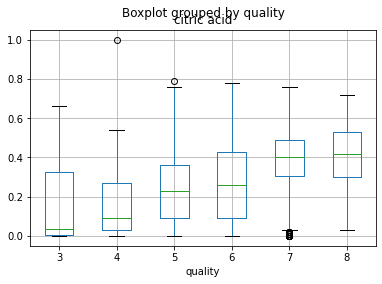

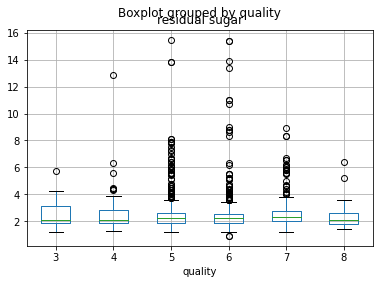

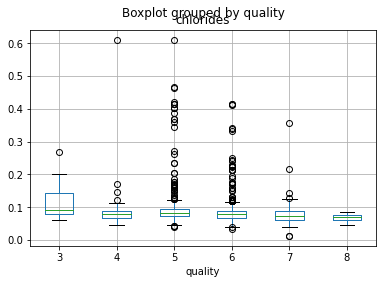

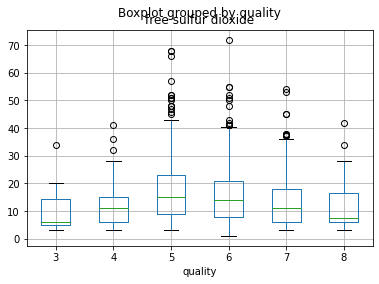

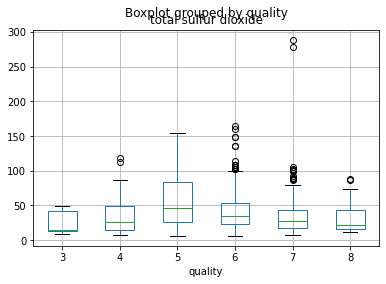

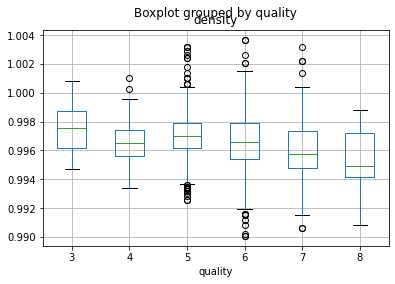

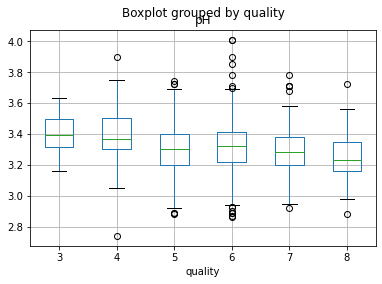

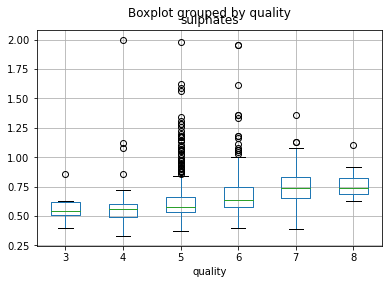

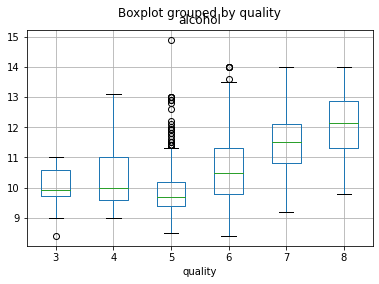

In [115]:
for f in features:
    df.boxplot(column=f, by=output)
    plt.title(f)
plt.show()

### Data Splitting

In [116]:
X = df[features].values
y = df[output].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12309, Testing size: 5280


### Data Scaling

In [118]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Functions for Analysing Results

### Probability Output

In [119]:
def get_probabilty_output(X_test, model_fitted):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100)
    styled_df = prob_df.style.background_gradient(cmap='Reds').hide_index()
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

### Multiclass Classification Report

In [133]:
def get_multiclass_classification_report(y_test,predictions):
    #Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")

    # Prediction Report
    print(classification_report(y_test, predictions, digits=3))
    print("Overall Accuracy:", accuracy_score(y_test, predictions))
    print("Overall Precision:", precision_score(y_test, predictions, average='macro'))
    print("Overall Recall:", recall_score(y_test, predictions, average='macro'))

### Multiclass Classification ROC

In [121]:
def get_multiclass_classification_ROC(X,y,model,test_size,random_state=0):
    y_bin = label_binarize(y, classes=np.unique(y))
    n_classes = y_bin.shape[1]
    
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=test_size, random_state=random_state)
    
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    model_fitted = classifier.fit(X_train, y_train)
    y_score = model_fitted.decision_function(X_test)
    
    
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10,10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'purple', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Classification Models

Let's start defining classification models <br> Models which are implemented: <br>
* Logitic Regression
* k-Nearest Neighbors
* Support Vector Classifier
* Naive Bayes
* Decision Tree
* Random Forest

## Logisitic Regression 

### Creating Model

In [122]:
#Hyperparameters
C = 100 # Inverse of regularization strength; smaller values specify stronger regularization.
solver = "liblinear" # {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
penalty = 'l2' # {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}


#Generating Model
model_LR = LogisticRegression(C=C,solver=solver).fit(X_train,y_train)
model_LR.fit(X_train,y_train)
print(model_LR)

LogisticRegression(C=100, solver='liblinear')


### Predicting

In [123]:
predictions_LR = model_LR.predict(X_test)
print("Predictions:",predictions_LR[:10])
print("Actual:",y_test[:10])

Predictions: [3 6 6 5 6 4 7 6 5 5]
Actual: [4 6 6 6 7 3 6 5 5 6]


### Result

In [124]:
get_probabilty_output(X_test=X_test, model_fitted=model_LR)

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.000     0.000     0.000        17
           5      0.643     0.808     0.716       203
           6      0.581     0.584     0.582       197
           7      0.440     0.212     0.286        52
           8      0.000     0.000     0.000         5

    accuracy                          0.604       480
   macro avg      0.277     0.267     0.264       480
weighted avg      0.558     0.604     0.573       480

Overall Accuracy: 0.6041666666666666
Overall Precision: 0.2773242226183403
Overall Recall: 0.26719609668585687


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


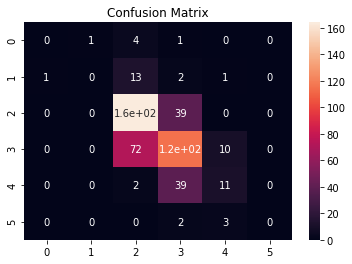

In [134]:
get_multiclass_classification_report(y_test,predictions_LR)

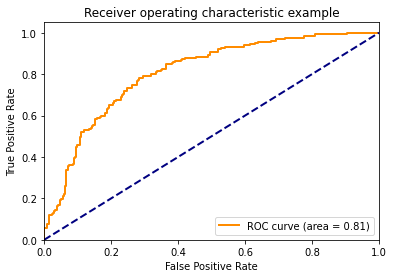

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


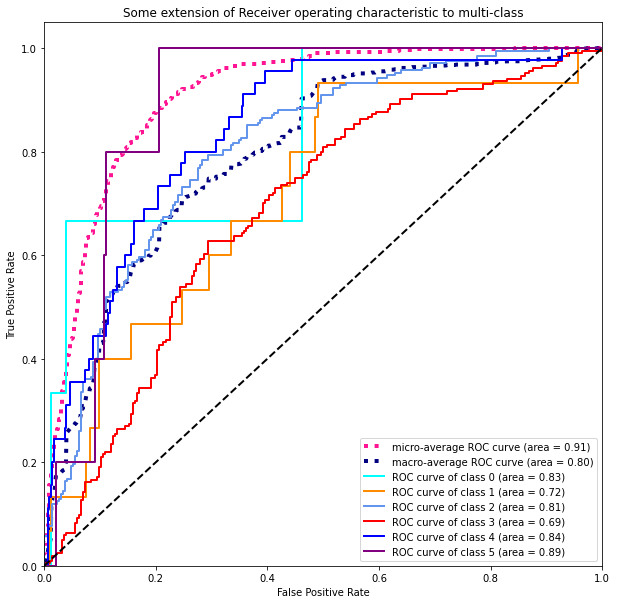

In [126]:
get_multiclass_classification_ROC(X,y,model_LR,test_size=0.3,random_state=0)

In [167]:
pca = PCA(n_components = 2)
X_train_1 = pca.fit_transform(X_train)
X_test_1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.28163699, 0.17152468])

In [173]:
model_LR_PCA = LogisticRegression(random_state = 0)
model_LR_PCA.fit(X_train_1, y_train)
predictions_LR_PCA = model_LR_PCA.predict(X_test_1)

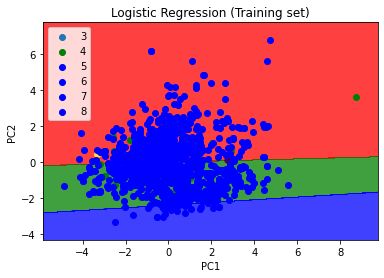

In [172]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_1, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_LR_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

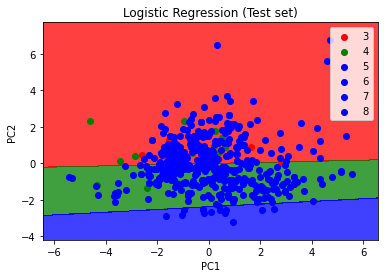

In [174]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_1, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_LR_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## k-Nearest Neighbor Classifier

### Creating Model

In [127]:
model_KNN = KNN(5)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting 

In [128]:
predictions_KNN = model_KNN.predict(X_test)
print("Predictions:",predictions_KNN[:10])
print("Actual:",y_test[:10])

Predictions: [5 4 6 5 7 5 7 6 5 5]
Actual: [4 6 6 6 7 3 6 5 5 6]


### Result

In [132]:
get_probabilty_output(X_test=X_test, model_fitted=model_KNN)

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.000     0.000     0.000        17
           5      0.602     0.640     0.621       203
           6      0.523     0.569     0.545       197
           7      0.457     0.404     0.429        52
           8      0.000     0.000     0.000         5

    accuracy                          0.548       480
   macro avg      0.264     0.269     0.266       480
weighted avg      0.519     0.548     0.533       480

Overall Accuracy: 0.5479166666666667
Overall Precision: 0.2636230128272658
Overall Recall: 0.2687946935496384


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


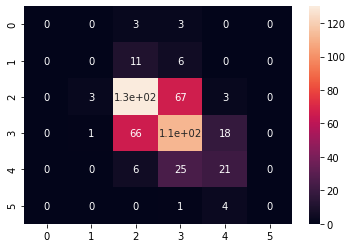

In [130]:
get_multiclass_classification_report(y_test,predictions_KNN)

In [143]:
#   get_multiclass_classification_ROC(X,y,model_KNN,test_size=0.3,random_state=0)

# NOT WORKING 
# IMPLEMENT MULTICLASS ROC FOR KNN

## Support Vector Classifier (SVC)

### Creating Model

In [138]:
# Hyperparameters
kernel = "linear"
random_state = 0

model_SVC = SVC(kernel=kernel, random_state=random_state, probability=True)
model_SVC.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

### Predicting

In [139]:
predictions_SVC = model_SVC.predict(X_test)
print("Predictions:",predictions_SVC[:10])
print("Actual:",y_test[:10])

Predictions: [5 6 6 5 6 5 6 6 5 5]
Actual: [4 6 6 6 7 3 6 5 5 6]


### Results

In [140]:
get_probabilty_output(X_test=X_test, model_fitted=model_SVC)

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.000     0.000     0.000        17
           5      0.638     0.798     0.709       203
           6      0.560     0.640     0.597       197
           7      0.000     0.000     0.000        52
           8      0.000     0.000     0.000         5

    accuracy                          0.600       480
   macro avg      0.200     0.240     0.218       480
weighted avg      0.500     0.600     0.545       480

Overall Accuracy: 0.6
Overall Precision: 0.19963254593175853
Overall Recall: 0.239603910879948


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


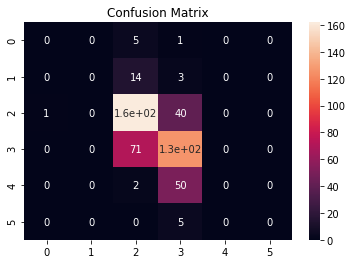

In [141]:
get_multiclass_classification_report(y_test,predictions_SVC)

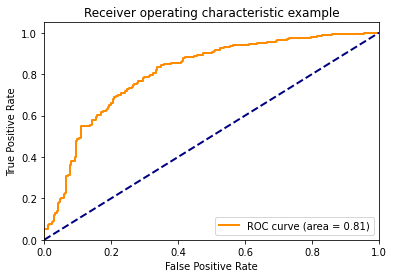

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


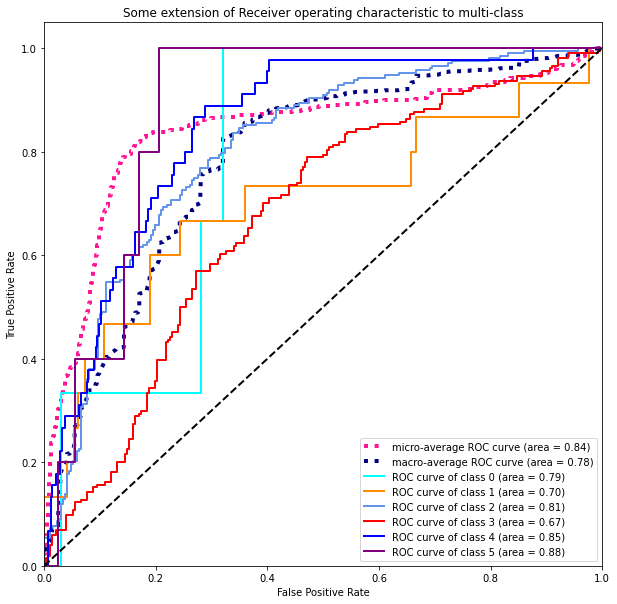

In [142]:
get_multiclass_classification_ROC(X,y,model_SVC,test_size=0.3,random_state=0)

## Naive Bayes Classifier

### Creating Model

In [144]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

### Predicting

In [146]:
predictions_NB = model_NB.predict(X_test)
print("Predictions:",predictions_NB[:10])
print("Actual:",y_test[:10])

Predictions: [3 6 6 5 7 3 8 5 5 5]
Actual: [4 6 6 6 7 3 6 5 5 6]


### Results

In [147]:
get_probabilty_output(X_test=X_test, model_fitted=model_NB)

              precision    recall  f1-score   support

           3      0.154     0.333     0.211         6
           4      0.091     0.059     0.071        17
           5      0.644     0.650     0.647       203
           6      0.546     0.508     0.526       197
           7      0.391     0.481     0.431        52
           8      0.250     0.200     0.222         5

    accuracy                          0.544       480
   macro avg      0.346     0.372     0.351       480
weighted avg      0.547     0.544     0.544       480

Overall Accuracy: 0.54375
Overall Precision: 0.34595512853522153
Overall Recall: 0.37179776868850295


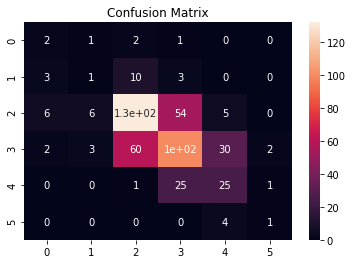

In [148]:
get_multiclass_classification_report(y_test,predictions_NB)

In [163]:
# get_multiclass_classification_ROC(X,y,model_NB,test_size=0.3,random_state=0)

# NOT WORKING

## Decision Tree Classifier 

### Creating Model

In [150]:
model_DT = DecisionTreeClassifier(criterion="entropy", random_state=0)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting

In [151]:
predictions_DT = model_DT.predict(X_test)
print("Predictions:",predictions_DT[:10])
print("Actual:",y_test[:10])

Predictions: [5 6 6 6 7 5 7 6 5 5]
Actual: [4 6 6 6 7 3 6 5 5 6]


### Results

In [152]:
get_probabilty_output(X_test=X_test, model_fitted=model_DT)

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.214     0.176     0.194        17
           5      0.648     0.690     0.668       203
           6      0.615     0.584     0.599       197
           7      0.483     0.538     0.509        52
           8      0.400     0.400     0.400         5

    accuracy                          0.600       480
   macro avg      0.393     0.398     0.395       480
weighted avg      0.591     0.600     0.595       480

Overall Accuracy: 0.6
Overall Precision: 0.39336095752593386
Overall Recall: 0.3980572740480484


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


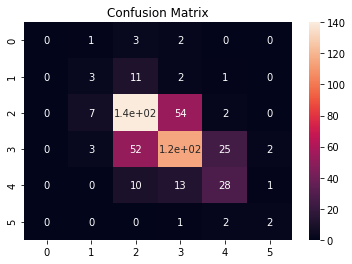

In [153]:
get_multiclass_classification_report(y_test,predictions_DT)

In [155]:
# get_multiclass_classification_ROC(X,y,model_DT,test_size=0.3,random_state=0)

# NOT WORKING

## Random Forest Classifier

### Creating Model

In [156]:
model_RF = RandomForestClassifier(n_estimators = 10, criterion="entropy", random_state=0)
model_RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting

In [157]:
predictions_RF = model_RF.predict(X_test)
print("Predictions:",predictions_DT[:10])
print("Actual:",y_test[:10])

Predictions: [5 6 6 6 7 5 7 6 5 5]
Actual: [4 6 6 6 7 3 6 5 5 6]


### Results

In [159]:
get_probabilty_output(X_test=X_test, model_fitted=model_RF)

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.000     0.000     0.000        17
           5      0.674     0.783     0.724       203
           6      0.647     0.614     0.630       197
           7      0.510     0.500     0.505        52
           8      1.000     0.200     0.333         5

    accuracy                          0.640       480
   macro avg      0.472     0.350     0.365       480
weighted avg      0.616     0.640     0.623       480

Overall Accuracy: 0.6395833333333333
Overall Precision: 0.4717652597762269
Overall Recall: 0.34957740491610617


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


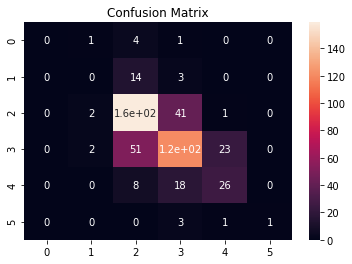

In [160]:
get_multiclass_classification_report(y_test,predictions_RF)

In [162]:
# get_multiclass_classification_ROC(X,y,model_RF,test_size=0.3,random_state=0)

# NOT WORKING